RATINGS PREDICTION PROJECT
Problem Statement:
We have a client who has a website where people write different reviews for technical products. Now they are adding a new feature to their website i.e. the reviewer will have to add stars (ratings) as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 3 stars, 4 stars and 5 stars. Now they want to predict ratings for the reviews which were written in the past and they don’t have a rating. So, we have to build an application which can predict the rating by seeing the review.

Model Building Phase
After collecting the data, you need to build a machine learning model. Before model building do all data preprocessing steps involving NLP. Try different models with different hyper parameters and select the best model. Follow the complete life cycle of data science. Include all the steps mentioned below:

Data Cleaning
Exploratory Data Analysis
Data Preprocessing
Model Building
Model Evaluation
Selecting the Best ML model

In [41]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#importing nltk libraries
import nltk
#nltk.download('all')
from nltk.corpus import stopwords
import re
import string
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import FreqDist

from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score,precision_score, confusion_matrix, accuracy_score,classification_report

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [42]:

lemmatizer = nltk.stem.WordNetLemmatizer()

In [43]:

#loading the data into a dataframe
df = pd.read_csv(r"C:\Users\sanka\Downloads\Compressed\Ratings-Prediction-Project-Data--Flip-Robo-main\Ratings-Prediction-Project-Data--Flip-Robo-main\Review_Rating_Datafile.csv")
df


,Unnamed: 0,Review_title,Review_text,Ratings
0,0,Suitable for School kids,\n If you are a College student or a professi...,2.0 out of 5 stars
1,1,Misrepresentation on MS Office 2019 license - ...,\n Update after one month usage - MS Office 2...,2.0 out of 5 stars
2,2,The sold me renewed laptop,\n It’s look like renewed laptop because lapt...,2.0 out of 5 stars
3,3,Amazon dupes with specification/ battery sucks,\n &nbsp;I had seen the specifications and bo...,2.0 out of 5 stars
4,4,Display back light issue,\n Display gone with 2 months.. But anyway th...,2.0 out of 5 stars
...,...,...,...,...
77545,77545,Nice product,good product,4
77546,77546,Awesome,Very good as expected and happy with the purchase,5
77547,77547,Awesome,I love it! No complaint!,5
77548,77548,Nice product,good product,4


Feature Information:

Review_title : title of the review

Review_text : content of the review text

Ratings : ratings out of 5 stars

At first I will drop the unwanted column Unnamed: 0

In [44]:
df.drop(columns = 'Unnamed: 0',inplace = True)

In [45]:

#checking the shape
print("Shape :", df.shape)


Shape : (77550, 3)


Great our data set is having 77550 rows and three columns now

In [46]:
#checking column names
print("Columns :", df.columns)

Columns : Index(['Review_title', 'Review_text', 'Ratings'], dtype='object')


In [47]:

#data types
df.dtypes


Review_title    object
Review_text     object
Ratings         object
dtype: object

In [48]:

#info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77550 entries, 0 to 77549
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review_title  68521 non-null  object
 1   Review_text   69465 non-null  object
 2   Ratings       68523 non-null  object
dtypes: object(3)
memory usage: 1.8+ MB


By checking all above observations we can say the data contains three columns Review_title , Reiew_text and Ratings. All columns are object type. Here Ratings column is our target column.

In [49]:

#missing values
df.isnull().sum()

Review_title    9029
Review_text     8085
Ratings         9027
dtype: int64

The data set is having lot of missing values and we will drop these values.

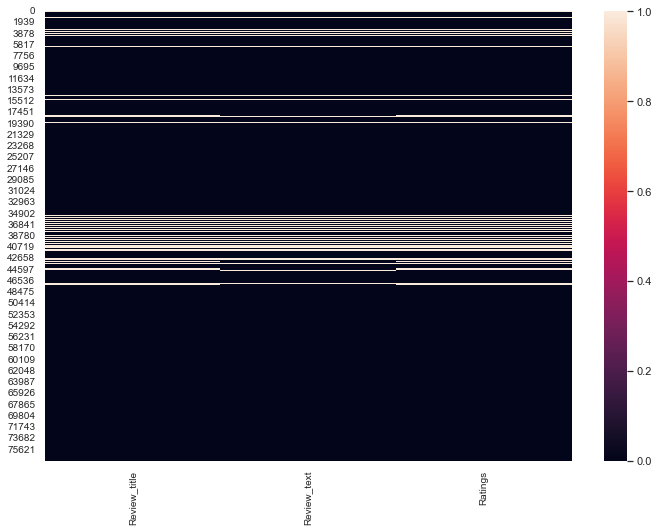

In [50]:

#Visualization of missing values
sns.set(rc={'figure.figsize':(11.8,8.27)})
sns.heatmap(data=df.isnull())
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show()


In [51]:

#Drop the rows where review_title and Reiew_text has null values
df.dropna(subset=['Review_title','Review_text'], inplace=True)


In [52]:
#checking for null values again
df.isnull().sum()


Review_title    0
Review_text     0
Ratings         0
dtype: int64

Great we have successfully removed all the missing data from our data set.

In [53]:

#lets check the shape of our data set now
df.shape


(68294, 3)

# Lets have a look at our target column

In [54]:

df['Ratings'].unique()


array(['2.0 out of 5 stars', '3.0 out of 5 stars', '1.0 out of 5 stars',
       '5.0 out of 5 stars', '4.0 out of 5 stars', '5', '1', '4', '3',
       '2'], dtype=object)

In [55]:
df['Ratings'] = df['Ratings'].replace('1.0 out of 5 stars',1)
df['Ratings'] = df['Ratings'].replace('2.0 out of 5 stars',2)
df['Ratings'] = df['Ratings'].replace('3.0 out of 5 stars',3)
df['Ratings'] = df['Ratings'].replace('4.0 out of 5 stars',4)
df['Ratings'] = df['Ratings'].replace('5.0 out of 5 stars',5)
df['Ratings'] = df['Ratings'].astype('int')


In [56]:
df['Ratings'].unique()

array([2, 3, 1, 5, 4])

# Combine Review_title and Reiew_text into one

In [58]:

#joining Review text and title
df['Review'] = df['Review_title'].map(str)+' '+df['Review_text']

In [59]:
#lets have a look at our data now
df


,Review_title,Review_text,Ratings,Review
0,Suitable for School kids,\n If you are a College student or a professi...,2,Suitable for School kids \n If you are a Coll...
1,Misrepresentation on MS Office 2019 license - ...,\n Update after one month usage - MS Office 2...,2,Misrepresentation on MS Office 2019 license - ...
2,The sold me renewed laptop,\n It’s look like renewed laptop because lapt...,2,The sold me renewed laptop \n It’s look like ...
3,Amazon dupes with specification/ battery sucks,\n &nbsp;I had seen the specifications and bo...,2,Amazon dupes with specification/ battery sucks...
4,Display back light issue,\n Display gone with 2 months.. But anyway th...,2,Display back light issue \n Display gone with...
...,...,...,...,...
77545,Nice product,good product,4,Nice product good product
77546,Awesome,Very good as expected and happy with the purchase,5,Awesome Very good as expected and happy with t...
77547,Awesome,I love it! No complaint!,5,Awesome I love it! No complaint!
77548,Nice product,good product,4,Nice product good product


# Visualizing text in first three rows from Review column

In [60]:

df['Review'][0]

'Suitable for School kids \n  If you are a College student or a professional who depends heavily on laptop for pretty much everyday then  this laptop is not for you. It hangs more often than it runs. Cannot install essential computer science software such as Eclipse or android studio because then this laptop just dies.<br><br>I took this laptop thinking that it will have good performance based on its configuration.<br><br>But if you are someone who wants to attend online classes or just browse, then you may go for this laptop.\n'

In [61]:

df['Review'][1]

'Misrepresentation on MS Office 2019 license - it is one month trial \n  Update after one month usage - MS Office 2019 preinstalled edition became unlicensed version within 30 days and refused to activate. HP support shared their product sheet that stated that this laptop came only with a trial version of MS Office 2019. Now I am chasing seller Appario Retail to honour the commitment.<br><br>Bad experience after paying high price (around ₹67,000) for preinstalled genuine software.<br><br>Other wise product has sleek looks, superfast fingerprint scanner, very good display, very responsive touchpad, decent (but tinny) speakers, USB C and barrel plug charging options and under 10 second boot up (SSD drive). Preloaded with Win10 Home and MS Office (not sure whether trial or full version). Drawbacks - weighs 1.42 kg, base gets warm rather quickly and so does the power adapter. Decent for a college student.\n'

In [62]:

df['Review'][2]

'The sold me renewed laptop \n  It’s look like renewed laptop because laptop charging jack is loose and left side speaker sounds like it’s tear. Bad sound quality  and finger sensor quality look like 2011 touch phone of wing and any Chinese phone touch. Waste of money and one more thing day by day Amazon product quality getting poor\n'

# Text Processing

In [ ]:
#Here I am defining a function to replace some of the contracted words to their full form and removing urls and some unwanted text 
def decontracted(text):
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don’t", "do not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"im ", "i am", text)
    text = re.sub(r"yo ", "you ",text)
    text = re.sub(r"doesn’t", "does not",text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"
", " ", text)
    text = re.sub(r'http\S+', '', text) #removing urls
    return text


In [ ]:
#Lowercasing
df['Review'] = df['Review'].apply(lambda x : x.lower())

df['Review'] = df['Review'].apply(lambda x : decontracted(x))

#removing punctuations
df['Review'] = df['Review'].str.replace('[^\w\s]','')
df['Review'] = df['Review'].str.replace('\n',' ')


# lets have a look at our text again

In [66]:

df['Review'][0]

'suitable for school kids \n  if you are a college student or a professional who depends heavily on laptop for pretty much everyday then  this laptop is not for you. it hangs more often than it runs. cannot install essential computer science software such as eclipse or android studio because then this laptop just dies.<br><br>i took this laptop thinking that it will have good performance based on its configuration.<br><br>but if you are someone who wants to attend online classes or just browse, then you may go for this laptop.\n'

In [67]:

df['Review'][1]

'misrepresentation on ms office 2019 license - it is one month trial \n  update after one month usage - ms office 2019 preinstalled edition became unlicensed version within 30 days and refused to activate. hp support shared their product sheet that stated that this laptop came only with a trial version of ms office 2019. now i am chasing seller appario retail to honour the commitment.<br><br>bad experience after paying high price (around ₹67,000) for preinstalled genuine software.<br><br>other wise product has sleek looks, superfast fingerprint scanner, very good display, very responsive touchpad, decent (but tinny) speakers, usb c and barrel plug charging options and under 10 second boot up (ssd drive). preloaded with win10 home and ms office (not sure whether trial or full version). drawbacks - weighs 1.42 kg, base gets warm rather quickly and so does the power adapter. decent for a college student.\n'

In [68]:

#Remove stopwords
stop = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [69]:

df['Review'][0]

'suitable school kids college student professional depends heavily laptop pretty much everyday laptop you. hangs often runs. cannot install essential computer science software eclipse android studio laptop dies.<br><br>i took laptop thinking good performance based configuration.<br><br>but someone wants attend online classes browse, may go laptop.'

In [70]:

df['Review'][1]


'misrepresentation ms office 2019 license - one month trial update one month usage - ms office 2019 preinstalled edition became unlicensed version within 30 days refused activate. hp support shared product sheet stated laptop came trial version ms office 2019. chasing seller appario retail honour commitment.<br><br>bad experience paying high price (around ₹67,000) preinstalled genuine software.<br><br>other wise product sleek looks, superfast fingerprint scanner, good display, responsive touchpad, decent (but tinny) speakers, usb c barrel plug charging options 10 second boot (ssd drive). preloaded win10 home ms office (not sure whether trial full version). drawbacks - weighs 1.42 kg, base gets warm rather quickly power adapter. decent college student.'

# Lemmatization

In [74]:
#Defining functiom to convert nltk tag to wordnet tags
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [75]:
#defining function to lemmatize our text
def lemmatize_sentence(sentence):
    #tokenize the sentence & find the pos tag
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x : (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatize_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatize_sentence.append(word)
        else:
            lemmatize_sentence.append(lemmatizer.lemmatize(word,tag))
    return " ".join(lemmatize_sentence)

In [ ]:
df['Review'] = df['Review'].apply(lambda x : lemmatize_sentence(x))

In [77]:

df['Review'][0]

'suitable school kids college student professional depends heavily laptop pretty much everyday laptop you. hangs often runs. cannot install essential computer science software eclipse android studio laptop dies.<br><br>i took laptop thinking good performance based configuration.<br><br>but someone wants attend online classes browse, may go laptop.'

In [78]:

df['Review'][1]


'misrepresentation ms office 2019 license - one month trial update one month usage - ms office 2019 preinstalled edition became unlicensed version within 30 days refused activate. hp support shared product sheet stated laptop came trial version ms office 2019. chasing seller appario retail honour commitment.<br><br>bad experience paying high price (around ₹67,000) preinstalled genuine software.<br><br>other wise product sleek looks, superfast fingerprint scanner, good display, responsive touchpad, decent (but tinny) speakers, usb c barrel plug charging options 10 second boot (ssd drive). preloaded win10 home ms office (not sure whether trial full version). drawbacks - weighs 1.42 kg, base gets warm rather quickly power adapter. decent college student.'

# Text Normalization - Standardization

In [80]:
#Noice removal
def scrub_words(text):
    #remove html markup
    text = re.sub("(<.*?>)", "", text)
    #remove non-ascii and digits
    text = re.sub("(\\W)", " ", text)
    text = re.sub("(\\d)", "", text)
    #remove white space
    text = text.strip()
    return text

In [81]:
df['Review'] = df['Review'].apply(lambda x : scrub_words(x))

In [82]:
df['Review'][0]

'suitable school kids college student professional depends heavily laptop pretty much everyday laptop you  hangs often runs  cannot install essential computer science software eclipse android studio laptop dies i took laptop thinking good performance based configuration but someone wants attend online classes browse  may go laptop'

In [83]:

df['Review'][1]

'misrepresentation ms office  license   one month trial update one month usage   ms office  preinstalled edition became unlicensed version within  days refused activate  hp support shared product sheet stated laptop came trial version ms office   chasing seller appario retail honour commitment bad experience paying high price  around     preinstalled genuine software other wise product sleek looks  superfast fingerprint scanner  good display  responsive touchpad  decent  but tinny  speakers  usb c barrel plug charging options  second boot  ssd drive   preloaded win home ms office  not sure whether trial full version   drawbacks   weighs   kg  base gets warm rather quickly power adapter  decent college student'

Now We have did all the text-processing steps and got required input for our model. We will go for EDA now

# Exploratory Data Analysis

# Word Counts

In [84]:
# #creating column for word counts in the text
df['Review_WC'] = df['Review'].apply(lambda x: len(str(x).split(' ')))
df[['Review_WC','Review']].head()



,Review_WC,Review
0,49,suitable school kids college student professio...
1,134,misrepresentation ms office license one mon...
2,49,sold renewed laptop it s look like renewed lap...
3,27,amazon dupes specification battery sucks nbs...
4,23,display back light issue display gone months ...


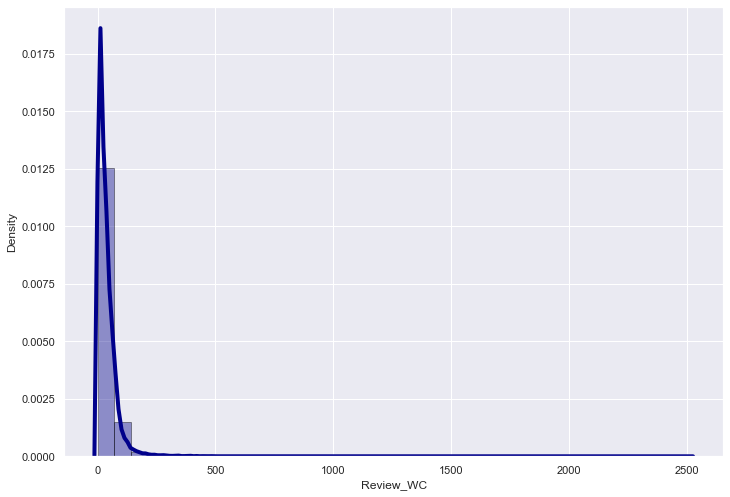

In [85]:

#density plot and histogram of all word count
sns.distplot(df['Review_WC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()


Looking at the above histogram we can clearly observe that most of our text is having the number of words in the range of 0 to 200, But some of the reviews are too lengthy which may act like outliers in our data.

Character count

In [86]:

#creating column for character counts in the text
df['Review_CC'] = df['Review'].str.len()
df[['Review_CC','Review']].head()

,Review_CC,Review
0,331,suitable school kids college student professio...
1,717,misrepresentation ms office license one mon...
2,272,sold renewed laptop it s look like renewed lap...
3,144,amazon dupes specification battery sucks nbs...
4,120,display back light issue display gone months ...


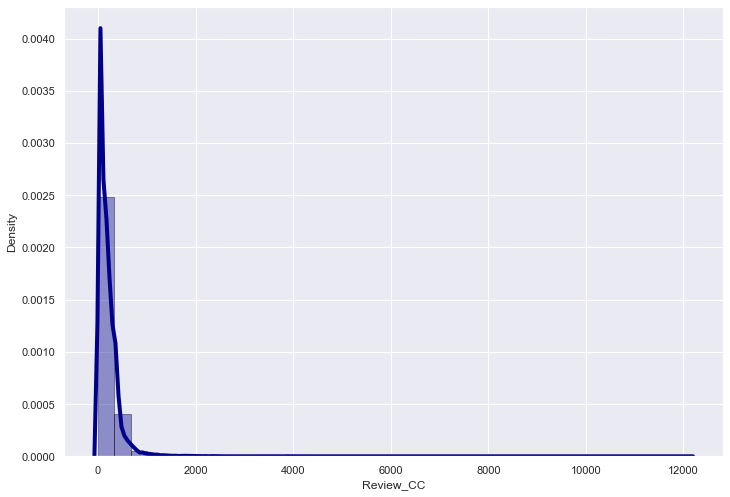

In [87]:

#density plot and histogram of all character count
sns.distplot(df['Review_CC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()



Above plot represents histogram for character count of review text, which is quite similar to the histogram of word count.

# Removing Outliers

As we know that some of the review are too lengthy I am removing those reviews from the dats as outliers using z_score method.

In [88]:
#apply zscore to remove outliers
from scipy import stats
from scipy.stats import zscore
z_score = zscore(df[['Review_WC']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.shape


(67330, 6)

Great, by removing outliers we are loosing only arround 1000 entries which is acceptable here for getting beter results for our model.

# Plotting histograms for word count and character counts again after removing outliers

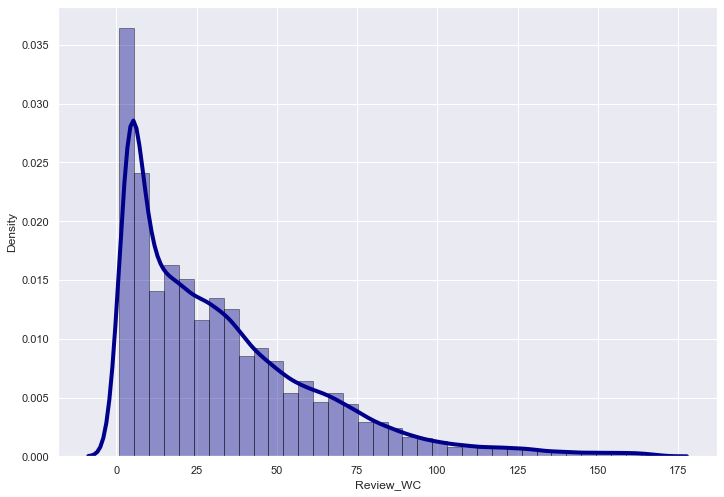

In [89]:
#density plot and histogram of all word count
sns.distplot(df['Review_WC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

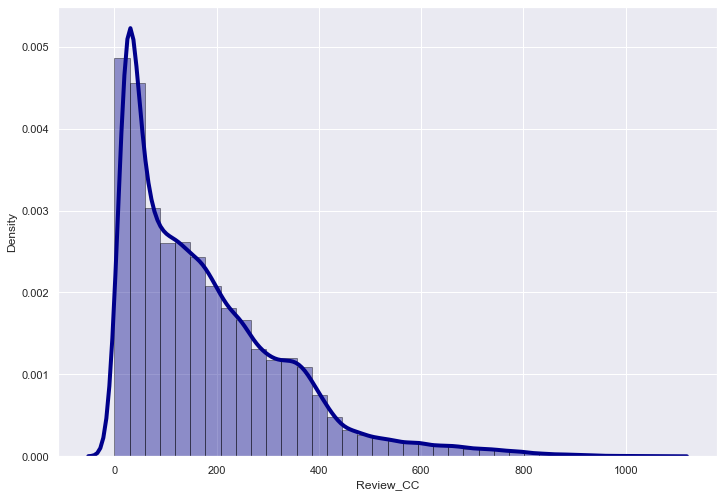

In [90]:
#density plot and histogram of all word count
sns.distplot(df['Review_CC'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()


After plotting histograms for word counts and character counts after removing outliers we can see now we are with good range of number of words and characters

In [91]:

#lets have a look at our data set
df


,Review_title,Review_text,Ratings,Review,Review_WC,Review_CC
0,Suitable for School kids,\n If you are a College student or a professi...,2,suitable school kids college student professio...,49,331
1,Misrepresentation on MS Office 2019 license - ...,\n Update after one month usage - MS Office 2...,2,misrepresentation ms office license one mon...,134,717
2,The sold me renewed laptop,\n It’s look like renewed laptop because lapt...,2,sold renewed laptop it s look like renewed lap...,49,272
3,Amazon dupes with specification/ battery sucks,\n &nbsp;I had seen the specifications and bo...,2,amazon dupes specification battery sucks nbs...,27,144
4,Display back light issue,\n Display gone with 2 months.. But anyway th...,2,display back light issue display gone months ...,23,120
...,...,...,...,...,...,...
77545,Nice product,good product,4,nice product good product,4,25
77546,Awesome,Very good as expected and happy with the purchase,5,awesome good expected happy purchase,5,36
77547,Awesome,I love it! No complaint!,5,awesome love it complaint,5,26
77548,Nice product,good product,4,nice product good product,4,25


5    26850
4    13735
1    10329
3     9057
2     7359
Name: Ratings, dtype: int64


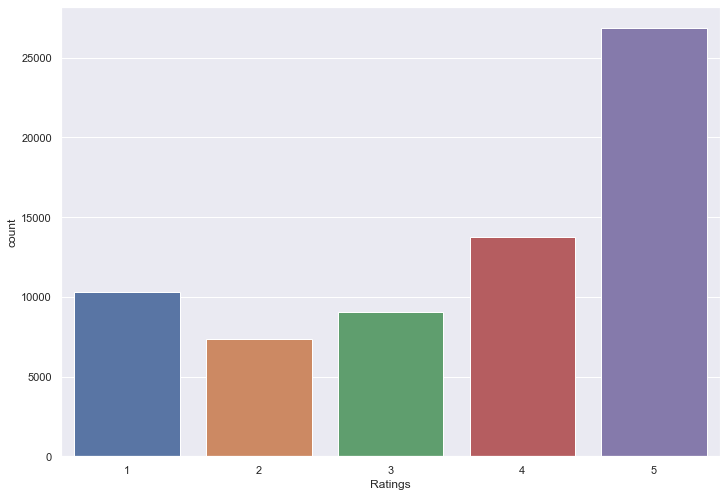

In [92]:
#Check the count of target column
sns.countplot(df['Ratings'])
print(df.Ratings.value_counts())
plt.show()


Looking at the above count plot for our target varible(Ratings) we can say that the data set is having most number of reviews rated as 5 star. and very less number of reviews rated as 2.
Which will cause the Imbalance problem for our model.
So I am selecting equal number of reviews of each rating as a input for our model
For that first I will shuffle the dataset so that we can select data from both web-sites
Then I will select equal number of data of every category

In [93]:
#shuffling the data set
df = df.sample(frac=1).reset_index(drop=True)

In [94]:

df

,Review_title,Review_text,Ratings,Review,Review_WC,Review_CC
0,Watch is good but the strap is low quality.,\n I have used this product for a week. Watch...,4,watch good strap low quality used product wee...,51,271
1,Nothing great about this...,\n After a month of use.. Nothing great about...,3,nothing great this month use nothing grea...,28,111
2,Awesome,\n Value for money\n,5,awesome value money,3,19
3,Must buy for work from home at a budget,\n I had bought the tru5 version earlier and ...,5,must buy work home budget bought tru version e...,73,432
4,noise Colour fit pro 2. Go for it guys. Awesom...,"\n If u consider pricing , it is not possible...",5,noise colour fit pro go guys awesome produc...,52,303
...,...,...,...,...,...,...
67325,Product not reliable,\n 2 times product delivered to me....both th...,1,product reliable times product delivered me ...,33,182
67326,Headphones and speaker faulty,\n Speakers of this phone are malfunctioning....,3,headphones speaker faulty speakers phone malfu...,14,94
67327,Average quality,\n I really enjoyed using these earphones. Th...,3,average quality really enjoyed using earphones...,92,533
67328,Excellent,Nice product 👌,5,excellent nice product,3,22


In [95]:

#selct data from every category
df1 = df[df['Ratings']==1][0:7356]
df2 = df[df['Ratings']==2][0:7356]
df3 = df[df['Ratings']==3][0:7356]
df4 = df[df['Ratings']==4][0:7356]
df5 = df[df['Ratings']==5][0:7356]

In [96]:

#Combining all the dataframes into one and shuffling them 
df = pd.concat([df1,df2,df3,df4,df5],ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)
df


,Review_title,Review_text,Ratings,Review,Review_WC,Review_CC
0,Good,\n Good product\n,5,good good product,3,17
1,"₹ 9,699.00 - is a bit expensive for 23.5 inch.",\n I am using this monitor also as TV by conn...,4,bit expensive inch using monitor also tv co...,58,295
2,Mic and one side earphone has stopped working ...,\n It's good ! Nice sound quality ! But the m...,2,mic one side earphone stopped working not e...,65,333
3,Don't buy this product total fraud,\n I received the laptop in morning didn't st...,1,buy product total fraud received laptop mornin...,14,83
4,Worst product,"\n Received on time, but was not working, eve...",1,worst product received time working even rep...,22,116
...,...,...,...,...,...,...
36775,if you're okay with settling for something mod...,\n The sound quality is pretty fine. That's t...,3,okay settling something moderate mediocre you...,44,253
36776,Brilliant,After using one week I fell fell the laptop is...,5,brilliant using one week fell fell laptop good...,39,238
36777,A decent wireless headphone. Bad bluetooth con...,\n The headphone is primarily used for attend...,3,decent wireless headphone bad bluetooth conne...,53,357
36778,Aux-in doesn't work,\n &nbsp;I have bought this product on 23rd A...,3,aux in work nbsp i bought product rd august ...,58,310


5    7356
4    7356
2    7356
1    7356
3    7356
Name: Ratings, dtype: int64


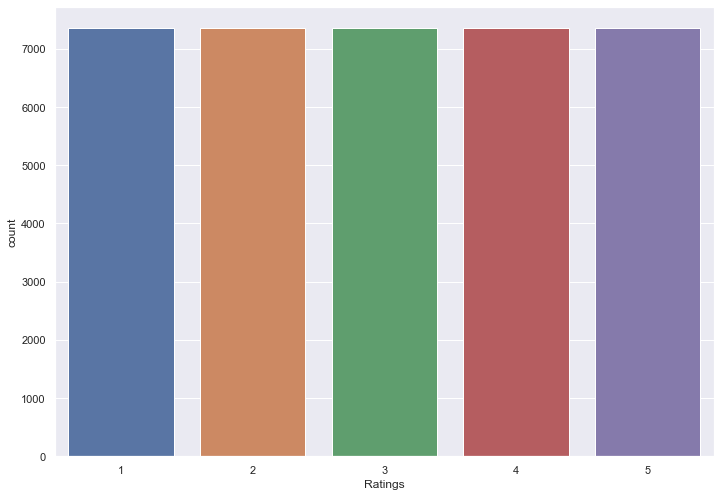

In [97]:

#lets Check the count of target column again
sns.countplot(df['Ratings'])
print(df.Ratings.value_counts())
plt.show()


great, we have balanced our data.

# Top 30 most frequently occuring words

In [98]:
#function to plot most frequent terms
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    #selecting top 30 most freq words
    d = words_df.nlargest(columns = 'count', n = terms)
    plt.figure(figsize = (20,10))
    ax = sns.barplot(data = d, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()

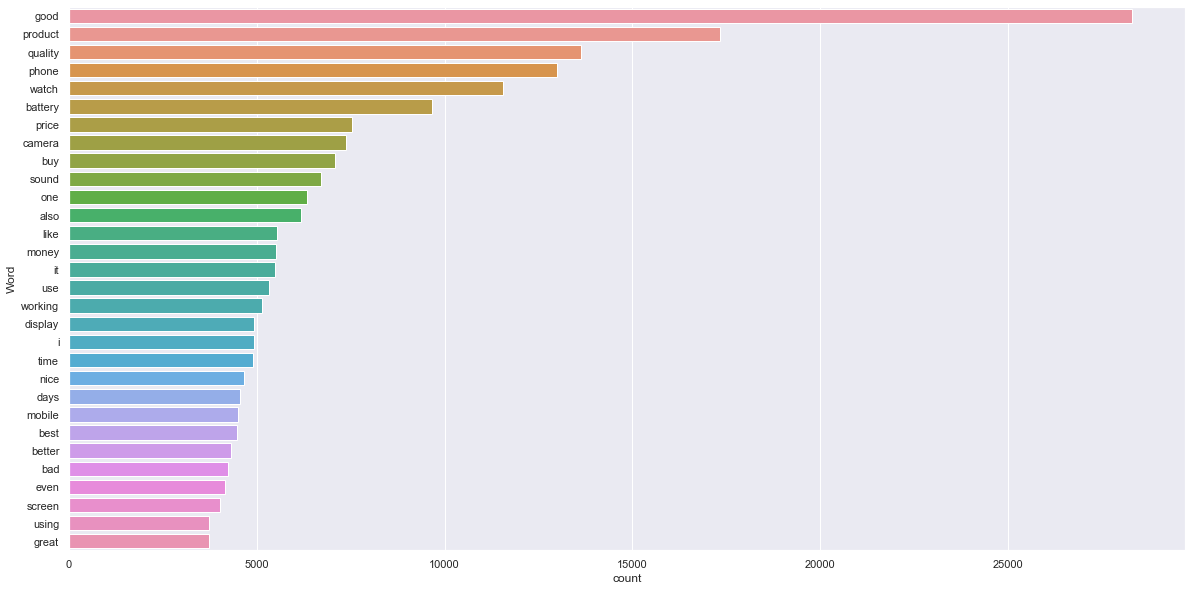

In [99]:

freq_words(df['Review'])


In [100]:

!pip install wordcloud

# Word cloud

In [101]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
                    background_color='white',
                    stopwords = stopwords,
                    max_words = 500,
                    max_font_size = 40,
                    scale = 3,
                    random_state = 1).generate(str(data))
    fig = plt.figure(1, figsize=(15,15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

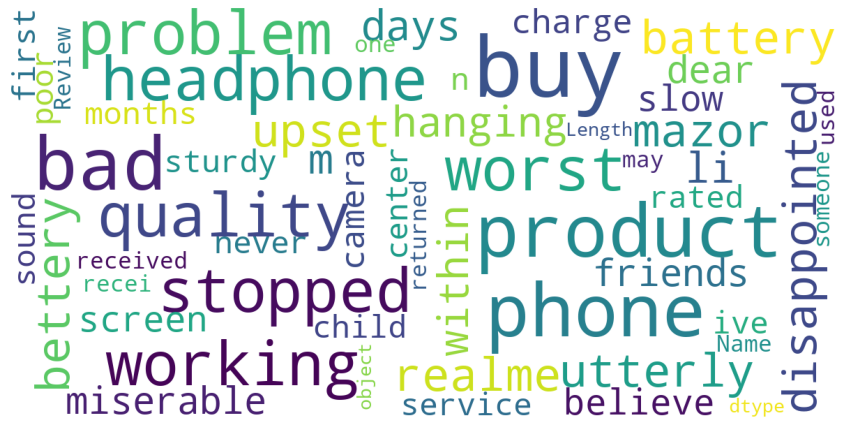

In [102]:
show_wordcloud(df1['Review'])

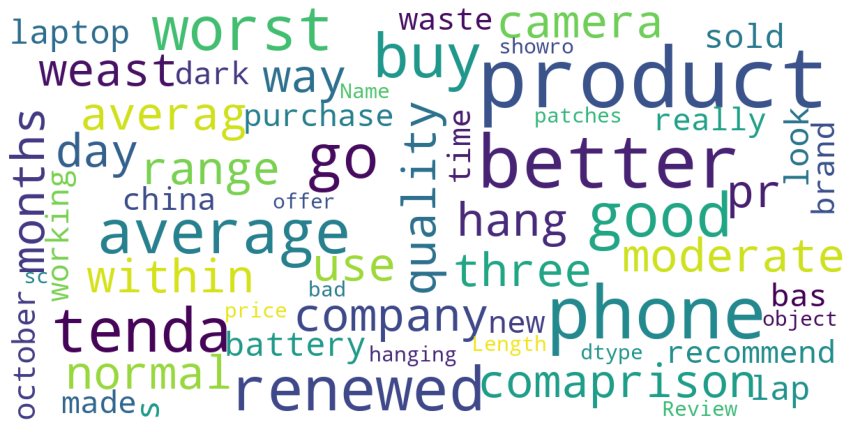

In [103]:

show_wordcloud(df2['Review'])

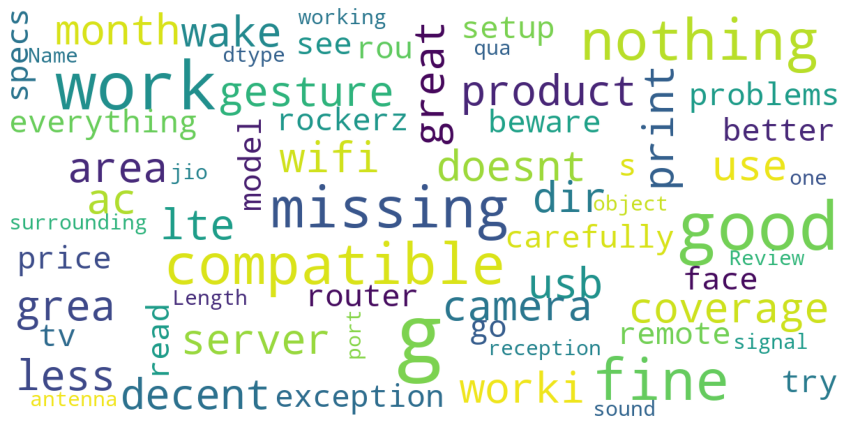

In [104]:

show_wordcloud(df3['Review'])

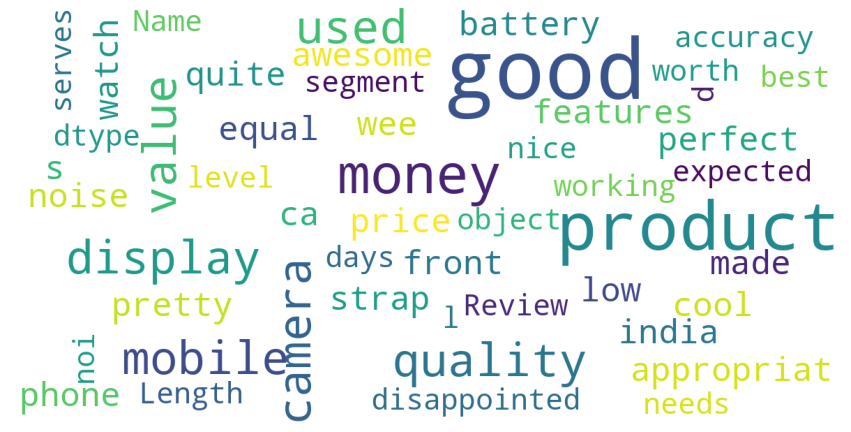

In [105]:

show_wordcloud(df4['Review'])

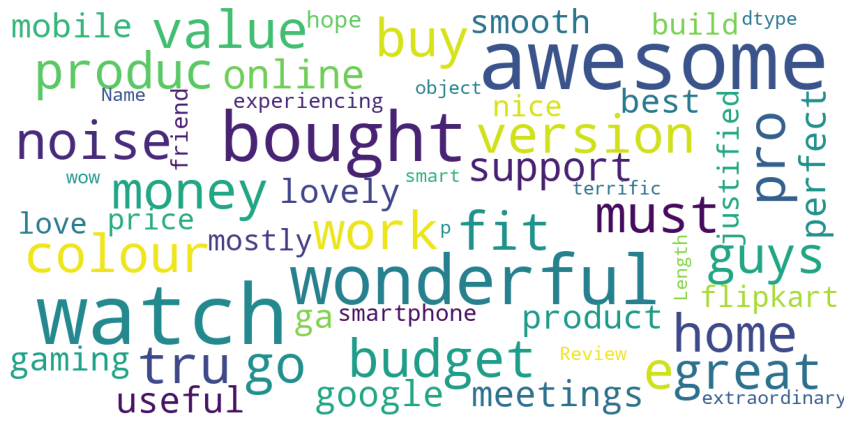

In [106]:

show_wordcloud(df5['Review'])

# Model Building and Evaluation

In [112]:


#separating features and labels
x = df['Review']
y = df['Ratings']




# Converting text into vectors using TfidfVectorizer

In [113]:
x

0                                        good good product
1        bit expensive   inch  using monitor also tv co...
2        mic one side earphone stopped working    not e...
3        buy product total fraud received laptop mornin...
4        worst product received time  working  even rep...
                               ...                        
36775    okay settling something moderate mediocre  you...
36776    brilliant using one week fell fell laptop good...
36777    decent wireless headphone  bad bluetooth conne...
36778    aux in work  nbsp i bought product rd august  ...
36779    zebronics headset good headset price quoted   ...
Name: Review, Length: 36780, dtype: object

In [114]:
y

0        5
1        4
2        2
3        1
4        1
        ..
36775    3
36776    5
36777    3
36778    3
36779    4
Name: Ratings, Length: 36780, dtype: int32

In [115]:

#using the n_gram tfidf vectorizer(Word vectors)
word_vectorizer = TfidfVectorizer(
                                sublinear_tf = True,
                                strip_accents = 'unicode',
                                analyzer = 'word',
                                token_pattern = r'\w{1,}',
                                stop_words = 'english',
                                ngram_range = (1,3),
                                max_features = 100000)
word_vectorizer.fit(x)
train_word_features = word_vectorizer.transform(x)


In [116]:

#Character vectors
char_vectorizer = TfidfVectorizer(
                                sublinear_tf = True,
                                strip_accents = 'unicode',
                                analyzer = 'char',
                                stop_words = 'english',
                                ngram_range = (2,6),
                                max_features = 50000)
char_vectorizer.fit(x)
train_char_features = char_vectorizer.transform(x)


In [117]:

#I will combine both word vectors and character vectors as input for our model
train_features = hstack([train_char_features,train_word_features])


# Splitting the data into train and test

In [128]:

seed = 1
x_train, x_test, y_train, y_test = train_test_split(train_features, y, test_size = 0.25, random_state = seed)

In [129]:

#lets check the shapes of traning and test data
print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)


x_train (27585, 150000)
x_test (9195, 150000)
y_train (27585,)
y_test (9195,)


In [130]:
#defining the algorithms
rf = RandomForestClassifier()
svc = LinearSVC()
lr = LogisticRegression(solver='lbfgs')
mnb = MultinomialNB()
bnb = BernoulliNB()
lgb = LGBMClassifier()
sgd = SGDClassifier()


In [131]:
#creating a function to train and test the model with evaluation
def BuiltModel(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_train)
    pred = model.predict(x_test)

    accuracy = accuracy_score(y_test,pred)*100

    print(f"Accuracy Score:", accuracy)
    print("---------------------------------------------------")

    #confusion matrix & classification report
    
    print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")
    print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred)}\n")
    

# Training and testing of various algorithms

In [132]:
for model in [lr,svc,bnb,mnb,sgd,rf]:
    BuiltModel(model)


******************************LogisticRegression******************************
Accuracy Score: 71.47362697118
---------------------------------------------------
CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           1       0.75      0.76      0.75      1907
           2       0.61      0.64      0.62      1865
           3       0.64      0.64      0.64      1813
           4       0.73      0.71      0.72      1848
           5       0.85      0.83      0.84      1762

    accuracy                           0.71      9195
   macro avg       0.72      0.72      0.72      9195
weighted avg       0.72      0.71      0.72      9195

Confusion Matrix : 
 [[1441  339  101   18    8]
 [ 311 1185  263   87   19]
 [ 135  281 1167  187   43]
 [  31   98  221 1320  178]
 [  14   35   60  194 1459]]

******************************LinearSVC******************************
Accuracy Score: 71.72376291462751
---------------------------------------------------
CLAS

Great, among all these algorithms 4 are giving good accuracies: LogisticRegression, LinearSVC and SGDClassifier 

# Cross validation score

In [137]:
def cross_val(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    scores = cross_val_score(model,train_features,y, cv = 3).mean()*100
    print("Cross validation score :", scores)


I am checking cross-validation score only for those algorithms which are giving us better accuracies

In [138]:

for model in [lr,svc,sgd]:
    cross_val(model)


******************************LogisticRegression******************************
Cross validation score : 70.63893420337139
******************************LinearSVC******************************
Cross validation score : 70.59543230016313
******************************SGDClassifier******************************
Cross validation score : 70.20391517128873


# HyperParameter Tuning

In [139]:
#lets selects different parameters for tuning
grid_params = {
                'penalty':['l2'],
                'loss':['hinge','squared_hinge'],
                'multi_class': ['ovr'],
                'intercept_scaling':[2,3],
                'dual':[True,False],
                }


In [140]:

#train the model with given parameters using GridSearchCV
GCV =  GridSearchCV(svc, grid_params, cv = 3, verbose=10)
GCV.fit(x_train,y_train)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3; 1/8] START dual=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l2
[CV 1/3; 1/8] END dual=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l2;, score=0.677 total time= 1.1min
[CV 2/3; 1/8] START dual=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l2
[CV 2/3; 1/8] END dual=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l2;, score=0.682 total time=  44.5s
[CV 3/3; 1/8] START dual=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l2
[CV 3/3; 1/8] END dual=True, intercept_scaling=2, loss=hinge, multi_class=ovr, penalty=l2;, score=0.678 total time=  50.9s
[CV 1/3; 2/8] START dual=True, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l2
[CV 1/3; 2/8] END dual=True, intercept_scaling=2, loss=squared_hinge, multi_class=ovr, penalty=l2;, score=0.677 total time=  24.8s
[CV 2/3; 2/8] START dual=True, intercept_scaling=2, loss=squared

GridSearchCV(cv=3, estimator=LinearSVC(),
             param_grid={'dual': [True, False], 'intercept_scaling': [2, 3],
                         'loss': ['hinge', 'squared_hinge'],
                         'multi_class': ['ovr'], 'penalty': ['l2']},
             verbose=10)

In [141]:

GCV.best_params_       #printing the best parameters found by GridSearchCV

{'dual': True,
 'intercept_scaling': 3,
 'loss': 'squared_hinge',
 'multi_class': 'ovr',
 'penalty': 'l2'}

# Final Model

In [145]:
#training and testing our final model with above parameters
model = LinearSVC(dual = True, intercept_scaling = 3, loss = 'squared_hinge', multi_class = 'ovr', penalty = 'l2')
model.fit(x_train,y_train) #fitting data to model
pred = model.predict(x_test)
accuracy = accuracy_score(y_test,pred)*100

#printing accuracy score
print("Accuracy Score :", accuracy)

#printing Confusion matrix
print(f"\nConfusion Matrix : \n {confusion_matrix(y_test,pred)}\n")

#printing Classification report
print(f"\nCLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")



Accuracy Score : 71.73463839042958

Confusion Matrix : 
 [[1455  286  121   32   13]
 [ 291 1199  253   95   27]
 [ 133  287 1135  204   54]
 [  36   91  190 1327  204]
 [  16   30   58  178 1480]]


CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           1       0.75      0.76      0.76      1907
           2       0.63      0.64      0.64      1865
           3       0.65      0.63      0.64      1813
           4       0.72      0.72      0.72      1848
           5       0.83      0.84      0.84      1762

    accuracy                           0.72      9195
   macro avg       0.72      0.72      0.72      9195
weighted avg       0.72      0.72      0.72      9195



# Model Saving

In [146]:

import joblib
joblib.dump(model,"Rating_Prediction.pkl")


['Rating_Prediction.pkl']

Conclusion:
    
Key findings of the study :

In this project I have collected data of reviews and ratings for different products from amazon.in and flipkart.com. Then I have done different text processing for reviews column and chose equal number of text from each rating class to eliminate problem of imbalance. By doing different EDA steps I have analyzed the text. We have checked frequently occurring words in our data as well as rarely occurring words. After all these steps I have built function to train and test different algorithms and using various evaluation metrics I have selected LinearSVC for our final model. Finally by doing hyperparameter tuning we got optimum parameters for our final model. And finally we got improved accuracy score for our final model.

Limitations of this work and scope for the future work :

As we know the content of text in reviews is totally depends on the reviewer and they may rate differently which is totally depends on that particular person. So it is difficult to predict ratings based on the reviews with higher accuracies. Still we can improve our accuracy by fetching more data and by doing extensive hyperparameter tuning.